<a href="https://colab.research.google.com/github/ricochet-anr/TutoRico-2023/blob/main/TutoRico2_bispy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial 

In [6]:
!pip install numpy scipy matplotlib numpy-quaternion
!git clone https://github.com/jflamant/bispy.git
!cd bispy/; ls; pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'bispy' already exists and is not an empty directory.
bispy		build  doc-requirements.txt  README.md	       scripts	 tests
bispy.egg-info	doc    notebooks	     requirements.txt  setup.py
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/bispy
  Preparing metadata (setup.py) ... done
  Created wheel for bispy: filename=bispy-0.9.dev0-py3-none-any.whl size=24375 sha256=2be398305244920c2fa2ae2a1f0a22fd2d7260cdeb9b7ccd92882a3a9c33d991
  Stored in directory: /tmp/pip-ephem-wheel-cache-pusxnsv0/wheels/9d/1a/84/7defbd020693e72ba31e94c0fd23f086fdf25bef5f7f9c4d28
Successfully built bispy
  Attempting uninstall: bispy
    Found existing installation: bispy 0.9.dev0
    Uninstalling bispy-0.9.dev0:
      Successfully uninstalled bispy-0.9.dev0


In [2]:
!git clone https://github.com/jflamant/bispy.git

Cloning into 'bispy'...
remote: Enumerating objects: 552, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 552 (delta 2), reused 4 (delta 2), pack-reused 543
Receiving objects: 100% (552/552), 4.78 MiB | 9.89 MiB/s, done.
Resolving deltas: 100% (276/276), done.


In [4]:
!cd bispy/

In [5]:
!cd bispy/; ls; pip install .

bispy  doc-requirements.txt  README.md	       scripts	 tests
doc    notebooks	     requirements.txt  setup.py
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/bispy
  Preparing metadata (setup.py) ... done
  Created wheel for bispy: filename=bispy-0.9.dev0-py3-none-any.whl size=24375 sha256=778ad1712c39f77f5272f7b0b04ddee2e11c404712c42fbb2417e4e632e1bd85
  Stored in directory: /tmp/pip-ephem-wheel-cache-kfolc7rn/wheels/9d/1a/84/7defbd020693e72ba31e94c0fd23f086fdf25bef5f7f9c4d28
Successfully built bispy


In [ ]:
import bispy as bsp
import numpy as np

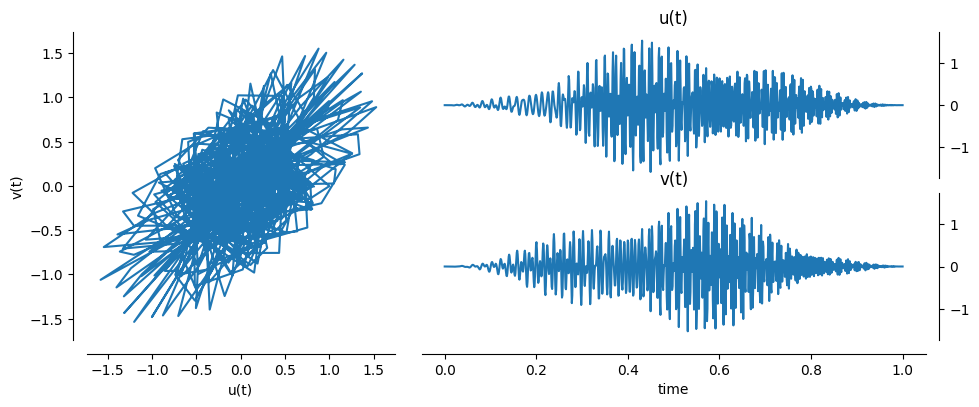

In [ ]:
N = 1024 # length of the signal

# linear chirps constants
a = 250*np.pi
b = 50*np.pi
c = 150*np.pi

# time vector
t = np.linspace(0, 1, N)

# first chirp
theta1 = np.pi/4 # constant orientation
chi1 = np.pi/6-t # reversing ellipticity
phi1 = b*t+a*t**2 # linear chirp

# second chirp
theta2 = np.pi/4*10*t # rotating orientation
chi2 = 0 # constant null ellipticity
phi2 = c*t+a*t**2 # linear chirp

# common amplitude -- simply a window
env = bsp.utils.windows.hanning(N)

# define chirps x1 and x2
x1 = bsp.signals.bivariateAMFM(env, theta1, chi1, phi1)
x2 = bsp.signals.bivariateAMFM(env, theta2, chi2, phi2)

# sum it
x = x1 + x2

fig, ax = bsp.utils.visual.plot2D(t, x)